In [1]:
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)



In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

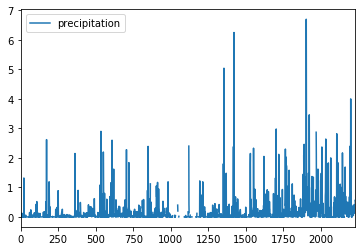

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()


In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# How many stations are available in this dataset?
session.query()
session.query(func.count(Station.station)).all()

[(9)]

In [12]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()




[(54.0, 85.0, 71.66378066378067)]

In [14]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])


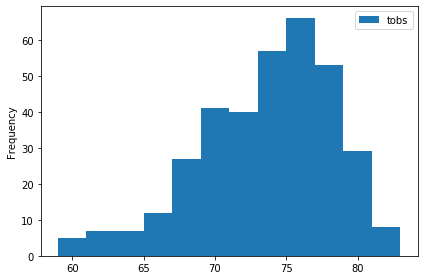

In [15]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
df.plot.hist(bins=12)
plt.tight_layout()


# Challenge

In [16]:
#June data analysis for all years and all stations
JuneAll = pd.read_sql_query("select date, tobs, prcp,strftime('%m',date) month, strftime('%Y',date) year from measurement where strftime('%m',date) = '06'", engine).describe()
print('June Data across all stations and years')
print('---------------------------------------')
print (JuneAll)

June Data across all stations and years
---------------------------------------
              tobs         prcp
count  1700.000000  1574.000000
mean     74.944118     0.136360
std       3.257417     0.335731
min      64.000000     0.000000
25%      73.000000     0.000000
50%      75.000000     0.020000
75%      77.000000     0.120000
max      85.000000     4.430000


In [17]:
#December data analysis for all years and all stations
DecemberAll = pd.read_sql_query("select date, tobs,prcp, strftime('m%',date) month, strftime('%Y',date) year from measurement where strftime('%m',date) = '12'", engine).describe()
print('December Data across all stations and years')
print('-------------------------------------------')
print (DecemberAll)

December Data across all stations and years
-------------------------------------------
              tobs         prcp
count  1517.000000  1405.000000
mean     71.041529     0.216819
std       3.745920     0.541399
min      56.000000     0.000000
25%      69.000000     0.000000
50%      71.000000     0.030000
75%      74.000000     0.150000
max      83.000000     6.420000


Analysis:
<br>1.The average temperature in June comes as 75 degree while the average for December shows as 71 degree. So there is around 4 degrees of temperature difference.
<br>2.The minimum temperature in June is 64 degree and in Dec is 56. So with the difference of 9 degrees there could be some impact on surfing during month of Dec
<br>3.But the difference in maximum temeperature is not very big and hence the afternoons may be equally warm.
<br>4.Though average percipitation is almost the same. THe maximum is 2 points more during the month of Dec then in June.

Recomendation for future analysis:
1. There are other factors like wind,volcano etc that can impact the inflow of surfers. So those should be analyzed.
2. We should check the frequency of max percipitation in Jun to make sure the impact days are not as many.
3. We can also analyze data per station to find the best station to put icecream shop.
4. We can analyze yearly data to get more details around the impact for the weather if any.

In [18]:
#Sample for future per year for all stations.
#June data analysis per year for all stations
JuneDF = pd.read_sql_query("select date, tobs, prcp,strftime('%m',date) month, strftime('%Y',date) year from measurement where strftime('%m',date) = '06'", engine).groupby('year').describe()
#December data analysis per year for all stations
DecemberDF = pd.read_sql_query("select date, tobs, prcp,strftime('%m',date) month, strftime('%Y',date) year from measurement where strftime('%m',date) = '12'", engine).groupby('year').describe()
